
```
---
title: Insult Classifcation
type:  lesson + lab + demo
duration: "1:25"
---
```
<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; width: 50px; margin: 10px">

#  Naive Bayes Demo / Lab + NLP
Week 8 | 4.3

![](https://snag.gy/i5b9BX.jpg)

In this dataset, we will be looking at labeled comments that look something like this:

> <div style="float: left; margin-right: 20px;"><img src="https://snag.gy/xX9hMZ.jpg" style="float: left; margin-right: 10px; width: 60px;">**Moon Master99BBQ**<br>Insult Connoisseur</div>"You're all upset, defending this hipster band...and WE'RE the douches for reading the news and discussing it?  Put down the PBR, throw away the trucker hat, shave off that silly shadow-beard, put down your "99%er" sign, and get a job, ION."

Fair warning, the content is fairly provacative but this type of problem is very common in the continuum of comment threads throughout the web.  You can also use this type of pipeline to build custom sentiment features for content specific domains that can be much more effecive than say TextBlob, for relatively low effort.


In [58]:
import pandas as pd, seaborn as sns, numpy as np, matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.learning_curve import learning_curve
from sklearn.cross_validation import train_test_split, cross_val_score, ShuffleSplit
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

%matplotlib inline

sns.set_style("darkgrid")

In [2]:
insults_df = pd.read_csv("assets/datasets/train.csv", encoding="utf-8")

*There are a variety of colorful expletives observed throughout this dataset.  This activity is strictly educational though and you should excersize critical thinking dispite the potentail comedic nature of the content.*

In [3]:
insults_df.head()

,Insult,Date,Comment
0,1,20120618192155Z,"""You fuck your dad."""
1,0,20120528192215Z,"""i really don't understand your point.\xa0 It ..."
2,0,NaN,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,0,NaN,"""listen if you dont wanna get married to a man..."
4,0,20120619094753Z,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."


### 1. Explore a list of comment words that occur more than 50x
Plot a histogram of some kind might be helpful.

In [33]:
cvt = CountVectorizer()
X_all = cvt.fit_transform(insults_df["Comment"])
X = pd.DataFrame(data=X_all.todense(), columns = cvt.get_feature_names())
## Complete your code -- observe the desired output already below frame
X.sum().nlargest(50)

the       4750
you       3953
to        3238
and       2771
of        2232
is        1701
that      1678
are       1559
it        1545
in        1528
your      1270
xa0       1223
for       1064
on         920
have       885
not        850
they       772
be         764
this       725
he         722
like       718
with       686
all        627
xc2        615
as         602
just       557
what       549
so         547
was        512
if         511
but        502
we         498
or         483
can        471
will       471
do         463
up         462
no         440
who        438
don        436
about      435
an         427
from       422
people     419
his        410
get        398
at         389
my         384
would      371
me         365
dtype: int64

### 1.5 Try it again with stopword removal 

In [34]:
cvt = CountVectorizer(stop_words="english")
X_all = cvt.fit_transform(insults_df["Comment"])
X = pd.DataFrame(data=X_all.todense(), columns = cvt.get_feature_names())
## Complete your code -- observe the desired output already below frame
X.sum().nlargest(50)
# observe desired output below

xa0        1223
like        718
xc2         615
just        557
don         436
people      419
know        328
think       302
fuck        242
x80         224
right       223
time        219
xe2         213
make        211
good        207
really      194
http        192
say         183
way         182
little      174
ass         171
want        171
fucking     170
obama       159
going       154
need        154
stupid      154
did         153
man         153
got         150
shit        148
idiot       144
better      137
life        133
look        129
does        125
gay         125
ll          124
said        118
years       118
money       115
bitch       108
come        108
white       106
day         104
big         100
lol         100
year        100
stop         98
let          95
dtype: int64

### 2. Explore ngrams between 2 and 4
Display the top 75 ngrams with frequencies.

In [43]:
cvt = CountVectorizer(stop_words="english", ngram_range=[2,4]) # look up the appropriate parameters
X_all = cvt.fit_transform(insults_df["Comment"])
X = pd.DataFrame(data=X_all.todense(), columns = cvt.get_feature_names())
## Complete your code -- observe the desired output already below frame
X.sum().nlargest(75)

xc2 xa0                    379
xe2 x80                    209
xa0 xa0                    144
http shar                   68
http shar es                68
shar es                     68
trade trade                 63
trade trade trade           62
trade trade trade trade     61
u2026 u2026                 59
xa0 xa0 xa0                 57
u2026 u2026 u2026           52
xa0 xa0 xa0 xa0             49
xa0 xc2                     46
xc2 xa0 xc2                 46
u2026 u2026 u2026 u2026     45
don know                    43
x80 x99s                    41
xe2 x80 x99s                41
look like                   35
xa0 xc2 xa0                 35
xc2 xa0 xc2 xa0             35
bit ly                      34
x80 x9d                     34
xe2 x80 x9d                 34
bit ly mrzlgv               32
gay marriage                32
ly mrzlgv                   32
x80 x99t                    30
xe2 x80 x99t                30
                          ... 
mrzlgv http shar            18
mrzlgv h

### 3. (Optional) try expanding the list of stopwords
There's definitely some extra crap floating around our lovely ngrams like xa0, x80, web urls, and a bunch of other things.  If you could remove them, this could help us improve the score.  Identify words / tokens that don't add much value to either class.  **You should additionally look at ngrams per class (insults vs non-insults) to fine tune your preprocessing.  This has the greatest potential to improve your results without tuning any model parameters.**

Using `nltk.corpus`, we can get a baseline list of stop words.  Try to expand it and pass it to our vectorizer.

In [41]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop = stop + ['www', 'xa0electr','com', 'div','shar', 'es','xa0', 'x80', 'http','x80','mrzlgv','nhttp', 'u2026', 'xe2', 'x99t', 'x9d', 'x99s', 'ly','xc2', 'u03dfc']
cvt = CountVectorizer(stop_words=stop, ngram_range=[2,4]) # look up the appropriate parameters
X_all = cvt.fit_transform(insults_df["Comment"])
X = pd.DataFrame(data=X_all.todense(), columns = cvt.get_feature_names())
## Complete your code -- observe the desired output already below frame
X.sum().nlargest(50)

trade trade                63
trade trade trade          62
trade trade trade trade    61
look like                  36
go back                    34
gay marriage               32
people like                27
looks like                 25
sound like                 23
united states              23
ha ha                      17
ron paul                   17
democrat representative    16
fox news                   16
would like                 16
years ago                  15
big deal                   14
come back                  14
go away                    14
right wing                 14
act like                   13
black people               13
sounds like                13
youtube watch              13
disqus guest               12
dont know                  12
last year                  12
like one                   12
like see                   12
many people                12
pleaded guilty             12
year old                   12
get life                   11
next time 

In [45]:
stop = stopwords.words('english')
stop = stop + ['www', 'xa0electr','com', 'div','shar', 'es','xa0', 'x80', 'http','x80','mrzlgv','nhttp', 'u2026', 'xe2', 'x99t', 'x9d', 'x99s', 'ly','xc2', 'u03dfc']
cvt = CountVectorizer(stop_words=stop, ngram_range=[2,4]) # look up the appropriate parameters
X_all = cvt.fit_transform(insults_df[insults_df.Insult == 0]["Comment"])
X = pd.DataFrame(data=X_all.todense(), columns = cvt.get_feature_names())
## Complete your code -- observe the desired output already below frame
X.sum().nlargest(50)

trade trade                63
trade trade trade          62
trade trade trade trade    61
gay marriage               29
look like                  25
looks like                 22
united states              22
people like                19
democrat representative    16
fox news                   15
ron paul                   14
would like                 14
years ago                  14
big deal                   13
disqus guest               12
ha ha                      12
pleaded guilty             12
youtube watch              12
come back                  11
go back                    11
anyone else                10
last year                  10
shock shock                10
sounds like                10
three years                10
act like                    9
class forum                 9
class forum item            9
democratic party            9
forum item                  9
give fucking                9
kh xf4ng                    9
many people                 9
president 

In [46]:
stop = stopwords.words('english')
stop = stop + ['www', 'xa0electr','com', 'div','shar', 'es','xa0', 'x80', 'http','x80','mrzlgv','nhttp', 'u2026', 'xe2', 'x99t', 'x9d', 'x99s', 'ly','xc2', 'u03dfc']
cvt = CountVectorizer(stop_words=stop, ngram_range=[2,4]) # look up the appropriate parameters
X_all = cvt.fit_transform(insults_df[insults_df.Insult == 1]["Comment"])
X = pd.DataFrame(data=X_all.todense(), columns = cvt.get_feature_names())
## Complete your code -- observe the desired output already below frame
X.sum().nlargest(50)

go back            23
sound like         15
black people       11
look like          11
ass nigga          10
get life            9
go away             9
shut fuck           9
crawl back          8
go get              8
people like         8
piece shit          8
dumb ass            7
screen name         7
suck dick           7
fat ass             6
like idiot          6
go fuck             5
ha ha               5
illegals good       5
next time           5
really stupid       5
right wing          5
son bitch           5
white people        5
year old            5
act like            4
bitch ass           4
cock sucker         4
dont know           4
dumb know           4
every single        4
feel like           4
fucked ya           4
fucking dumb        4
get rained          4
hope get            4
idiotic comment     4
ima fuck            4
like one            4
like see            4
little boy          4
many times          4
mother fucker       4
need us             4
non believ

### 4. Setup a test / train split of your data using any method you wish.
Try 70/30 to start.

In [50]:
y = insults_df.Insult
X = insults_df.Comment

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### 5. Setup a "Pipeline" to vectorize and use MultinomialNB classifier.
Check out our last lab to set this up.  Use lowercase, strip_accents, and optionally your updated stop_words.  Fit your comment data using your "Insult" feature as your response.

Fit your training data to your pipeline, then score it.

In [68]:
f

0.74290099769762086

### 5.5a Swap out MultinomialNB with BernoulliNB in the pipeline
How do they compare?

In [69]:
pipeline = Pipeline([
    ('vect', cvt),
    ('tfidf', TfidfTransformer()),
    ('cls', BernoulliNB())
]) 
pipeline.fit(X_train, y_train)

# don't forget to score
pipeline.score(X_test, y_test)

0.73445894090560249

### 5.5a Also try logistic regression, and random forrests in the pipeline
How do they compare?

In [70]:
pipeline = Pipeline([
    ('vect', cvt),
    ('tfidf', TfidfTransformer()),
    ('logr', LogisticRegression())
]) 
pipeline.fit(X_train, y_train)

# don't forget to score
pipeline.score(X_test, y_test)

0.79201841903300074

In [71]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('vect', cvt),
    ('tfidf', TfidfTransformer()),
    ('rf', RandomForestClassifier())
]) 
pipeline.fit(X_train, y_train)

# don't forget to score
pipeline.score(X_test, y_test)

0.80583269378357636

#### 5.5b Also try tweeking the paramters of CountVectorizer and TfidfTranformer.

Remove Tfidf also. Good / bad?

In [72]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('vect', cvt),
    ('rf', RandomForestClassifier())
]) 
pipeline.fit(X_train, y_train)

# don't forget to score
pipeline.score(X_test, y_test)

0.79278587874136608

The best seems to be with random forest and tfidf

### 6. Check your score.
Also, run a classification report and [plot AUC/ROC](../../week-04/2.3-evaluating_model_fit/code/AUC-ROC-codealong.ipynb).  Also, [review classfication reporting metrics](../../week-04/4.3-advanced-model_evaluation/code/starter-code/week4-4.1-classification-report.ipynb).

In [76]:
pred = pipeline.predict(X_test)
print(classification_report(y_test, pred, labels=[0, 1], target_names=['not insult', 'insult']))

             precision    recall  f1-score   support

 not insult       0.81      0.94      0.87       957
     insult       0.70      0.39      0.50       346

avg / total       0.78      0.79      0.77      1303



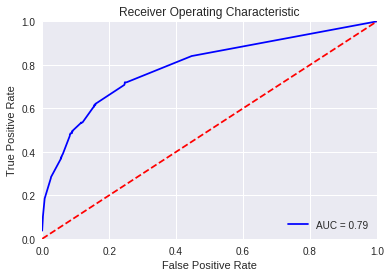

In [80]:
from sklearn.metrics import roc_curve, auc

pred_proba = pipeline.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, pred_proba[:,1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic');
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc);
plt.legend(loc = 'lower right');
plt.plot([0, 1], [0, 1],'r--');
plt.xlim([0, 1]);
plt.ylim([0, 1]);
plt.ylabel('True Positive Rate');
plt.xlabel('False Positive Rate');

## Lastly...

Check [this blog post](http://webmining.olariu.org/my-first-kaggle-competition-and-how-i-ranked/) by a guy who used SVM, a "neural network", a ton of cleaning, then placed 3rd in a Kaggle competition featuing this same dataset.  Given that you used a few basic techniques with preprocessing text and Naive Bayes, what do think about the tradeoffs of simplicity vs complexity of your model?

#### Where Next?

If you're interested in this type of problem, a great area to read up on is sentiment analysis.  This [Kaggle dataset](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data) is an excellent opportunity to practice more.  Also these whitepapers are great places to expand on this topic:

- [Fast and accurate sentiment classification using an
enhanced Naive Bayes model](http://arxiv.org/pdf/1305.6143.pdf) *Great overview!*
- [Sarcasm Detection](http://www.aclweb.org/anthology/P15-2124)
- [Making Computers Laugh:
Investigations in Automatic Humor Recognition](http://www.aclweb.org/anthology/H05-1067)
- [Modelling Sarcasm in Twitter, a Novel Approach](http://www.aclweb.org/anthology/W14-2609)
- [RUNNING HEAD: NARCISSISM AND LIE DETECTION](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/107345/zarins.finalthesis.pdf?sequence=1) *The study metrics are interesting*